In [1661]:
# To visualize plots in the notebook
%matplotlib inline

# Imported libraries
import csv
import random
import matplotlib
import matplotlib.pyplot as plt
import pylab
import numpy as np
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import matplotlib.colors
import re
from sklearn.metrics import confusion_matrix

%config InlineBackend.figure_format = 'retina' 

In [1662]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 300

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,
    
    # Fonts
    'font.size': 16,
    
    # Axes
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'axes.linewidth': 0.5,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'grid.color': 'gray',
    
    # Legend
    'legend.fontsize': 14,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,
    
    # Lines
   'lines.linewidth': 1.0, # set the default linewidth for plot lines to 1.0 points
   'lines.markersize': 4, # set the default marker size for plot markers to 6 points
    
    'axes.labelsize': 14, # set the font size of the axis labels to 10 points
    'axes.titlesize': 16, # set the font size of the plot title to 12 points
    'xtick.labelsize': 14, # set the font size of the x-axis tick labels to 8 points
    'ytick.labelsize': 14, # set the font size of the y-axis tick labels to 8 points
})


## AI

In [1663]:
df = pd.read_csv("task1_ai.csv")

In [1664]:
ratings_columns = [el for el in df.columns.tolist() if el.startswith("QR")]
intruder_columns = [el for el in df.columns.tolist() if not el.startswith("QR") and el.startswith("Q")]
intruder_columns[intruder_columns.index("Q423.1")] = "Q4231"

In [1665]:
intruder_ids = [int(el.split("Q")[1]) for el in intruder_columns]
ratings_ids = [int(el.split("QR")[1]) for el in ratings_columns]

In [1666]:
df_sols = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task1/output/ai.csv")
df_filtered = df_sols[df_sols['candidate_id'].isin(intruder_ids)]
df_sols = df_filtered[["candidate_id", "intruder", "cohrs_cv", "model_type"]].sort_values(by=['candidate_id'])
df_sols['candidate_id'] = df_sols['candidate_id'].astype('str')

In [1667]:
df_sols2 = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task3/output/ai.csv")
df_filtered2 = df_sols2[df_sols2['candidate_id'].isin(ratings_ids)]
df_sols2 = df_filtered2[["candidate_id", "cohrs_cv", "model_type"]].sort_values(by=['candidate_id'])
df_sols2['candidate_id'] = df_sols2['candidate_id'].astype('str')

In [1668]:
df_intruders = df.rename(columns={'Q423.1': 'Q4231'})[intruder_columns].drop([0,1])
df_ratings = df[ratings_columns].drop([0,1])

In [1669]:
df_intruders.columns = df_intruders.columns.str.extract(r'(\d+)', expand=False)
df_intruders = pd.concat([df["PROLIFIC_PID"].drop([0, 1]), df_intruders], axis=1).drop(12)#6
df_intruders.set_index("PROLIFIC_PID", inplace=True)
df_intruders

,304,423,405,435,420,412,298,99,155,4231,...,314,109,270,55,277,43,436,406,297,261
PROLIFIC_PID,,,,,,,,,,,,,,,,,,,,,
5e551bdb4f51d6000b8eb12a,facial_expression,feature,prediction,nursing,prediction,mapreduce,reconstruction,neuro_fuzzy,chatbot,speech_recognition,...,air_pollution,virtual_reality,job,gan,biomarker,stochastic_gradient,language,deep_learning,vaccination,quantization
5f8f52ffd211991aba7ecd1f,facial_expression,cdss,prediction,zigbee,prediction,mapreduce,reconstruction,membership_function,chatbot,cdss,...,air_pollution,virtual_reality,edge,coronary_artery,biomarker,convex,cancer,diagnosis,spatial,inference
5ebee8581f3004103ad74b5a,facial_expression,cdss,prediction,zigbee,image,mapreduce,patient,inference,chatbot,speech_recognition,...,character,pca,job,loss,storage,rate,language,recognition,spatial,cnn
5fbfc811235b1d1533a892eb,facial_expression,cdss,svm,scada,prediction,mapreduce,patient,t_s_method,chatbot,cdss,...,character,human,edge,coronary_artery,biomarker,patient,language,deep_learning,spatial,accelerator
605b2ced9d63e5c4590f2280,facial_expression,cdss,svm,zigbee,prediction,mapreduce,reconstruction,membership_function,ae,word,...,concentration,pca,sequence,loss,biomarker,convex,prediction,deep_learning,cost,accelerator
5cd959b304748d001819f233,facial_expression,feature,prediction,scada,classification,mapreduce,reconstruction,t_s_method,star,signal,...,character,pca,sequence,deep_learning,biomarker,rate,language,classification,spatial,cnn
6497e970e2621e753513a695,facial_expression,cdss,prediction,nursing,computer_vision,mapreduce,reconstruction,inference,ae,cdss,...,air_pollution,virtual_reality,job,loss,biomarker,patient,language,deep_learning,effectiveness,inference
614ee8ddba7641d7696ab82a,facial_expression,feature,activity,nursing,image,cognitive,reconstruction,inference,damage,signal,...,character,healthcare,edge,deep_learning,biomarker,optimization,language,image,cost,quantization
60fe54550c56a36a9a0558cd,facial_expression,cdss,activity,nursing,prediction,mapreduce,patient,tomography,ae,feature,...,character,pca,sequence,coronary_artery,biomarker,patient,language,recognition,incremental,cnn


In [1670]:
df1_transposed = df_intruders.transpose()
df1 = pd.merge(df1_transposed, df_sols, left_index=True, right_on='candidate_id').drop("candidate_id", axis=1)

for col in df1.columns[:-2]:
    df1[col + '_match'] = (df1[col] == df1['intruder']).astype(int)
df1['sum_of_match_high_cohr'] = df1.loc[df1['cohrs_cv'] > 0.5, df1.columns[df1.columns.str.contains('_match')]].sum(axis=1)
df1['sum_of_match_low_cohr'] = df1.loc[df1['cohrs_cv'] < 0.5, df1.columns[df1.columns.str.contains('_match')]].sum(axis=1)
df1.fillna(0, inplace=True)
df1['sum_of_match'] = df1['sum_of_match_high_cohr'] + df1['sum_of_match_low_cohr'] 
df1["cohrs"] = df1['cohrs_cv'].apply(lambda x: 'high' if x > 0.5 else 'low')
df1

,5e551bdb4f51d6000b8eb12a,5f8f52ffd211991aba7ecd1f,5ebee8581f3004103ad74b5a,5fbfc811235b1d1533a892eb,605b2ced9d63e5c4590f2280,5cd959b304748d001819f233,6497e970e2621e753513a695,614ee8ddba7641d7696ab82a,60fe54550c56a36a9a0558cd,61574d498a935593d413947f,...,6171b75b3c2b59f8487b4814_match,5f1c5d097881234e5034cb12_match,60b880518b31da36270782eb_match,5df6304773d724428a9cff45_match,5fb2727f2942a58418fd0d2b_match,intruder_match,sum_of_match_high_cohr,sum_of_match_low_cohr,sum_of_match,cohrs
304,facial_expression,facial_expression,facial_expression,facial_expression,facial_expression,facial_expression,facial_expression,facial_expression,facial_expression,facial_expression,...,1,1,1,1,1,1,16.0,0.0,16.0,high
423,feature,cdss,cdss,cdss,cdss,feature,cdss,feature,cdss,feature,...,0,1,1,0,1,1,10.0,0.0,10.0,high
405,prediction,prediction,prediction,svm,svm,prediction,prediction,activity,activity,prediction,...,1,1,0,1,1,1,0.0,7.0,7.0,low
435,nursing,zigbee,zigbee,scada,zigbee,scada,nursing,nursing,nursing,nursing,...,1,1,1,1,1,1,0.0,11.0,11.0,low
420,prediction,prediction,image,prediction,prediction,classification,computer_vision,image,prediction,speech_recognition,...,0,0,0,0,1,1,7.0,0.0,7.0,high
412,mapreduce,mapreduce,mapreduce,mapreduce,mapreduce,mapreduce,mapreduce,cognitive,mapreduce,human,...,1,1,1,0,1,1,0.0,13.0,13.0,low
298,reconstruction,reconstruction,patient,patient,reconstruction,reconstruction,reconstruction,reconstruction,patient,patient,...,1,1,0,1,0,1,10.0,0.0,10.0,high
99,neuro_fuzzy,membership_function,inference,t_s_method,membership_function,t_s_method,inference,inference,tomography,tomography,...,0,0,0,0,1,1,4.0,0.0,4.0,high
155,chatbot,chatbot,chatbot,chatbot,ae,star,ae,damage,ae,star,...,0,0,1,1,1,1,0.0,8.0,8.0,low
293,prediction,speech_recognition,speech_recognition,speech_recognition,prediction,prediction,prediction,prediction,prediction,prediction,...,1,1,0,1,1,1,8.0,0.0,8.0,high


In [1671]:
df_ratings.columns = df_ratings.columns.str.extract(r'(\d+)', expand=False)
df_ratings = pd.concat([df["PROLIFIC_PID"].drop([0, 1]), df_ratings], axis=1)
df_ratings.set_index("PROLIFIC_PID", inplace=True)
df_ratings

,314,198,233,415,183,430,399,403,279,429,...,409,178,258,25,27,32,73,40,436,420
PROLIFIC_PID,,,,,,,,,,,,,,,,,,,,,
5e551bdb4f51d6000b8eb12a,Very Related,Very Related,Somewhat Related,Not Related,Somewhat Related,Very Related,Very Related,Very Related,Somewhat Related,Somewhat Related,...,Not Related,Somewhat Related,Very Related,Not Related,Somewhat Related,Not Related,Somewhat Related,Somewhat Related,Very Related,Very Related
5f8f52ffd211991aba7ecd1f,Very Related,Very Related,Very Related,Very Related,Not Related,Somewhat Related,Very Related,Very Related,Somewhat Related,Not Related,...,Somewhat Related,Very Related,Not Related,Somewhat Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Very Related,Very Related
5ebee8581f3004103ad74b5a,Somewhat Related,Very Related,Very Related,Very Related,Very Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Very Related,...,Not Related,Very Related,Somewhat Related,Not Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Very Related,Very Related
5fbfc811235b1d1533a892eb,Very Related,Very Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Very Related,Somewhat Related,Not Related,Not Related,...,Somewhat Related,Somewhat Related,Not Related,Not Related,Somewhat Related,Not Related,Not Related,Not Related,Very Related,Somewhat Related
605b2ced9d63e5c4590f2280,Not Related,Very Related,Not Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Somewhat Related,Somewhat Related,Somewhat Related,...,Somewhat Related,Not Related,Very Related,Very Related,Somewhat Related,Somewhat Related,Not Related,Not Related,Very Related,Somewhat Related
5cd959b304748d001819f233,Very Related,Very Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Very Related,Not Related,Not Related,Not Related,...,Somewhat Related,Very Related,Somewhat Related,Not Related,Very Related,Very Related,Not Related,Somewhat Related,Very Related,Very Related
6497e970e2621e753513a695,Somewhat Related,Very Related,Not Related,Very Related,Not Related,Very Related,Very Related,Somewhat Related,Not Related,Somewhat Related,...,Very Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Somewhat Related,Somewhat Related,Very Related,Very Related,Very Related
614ee8ddba7641d7696ab82a,Very Related,Very Related,Somewhat Related,Somewhat Related,Very Related,Very Related,Very Related,Somewhat Related,Not Related,Somewhat Related,...,Somewhat Related,Not Related,Very Related,Not Related,Not Related,Not Related,Not Related,Somewhat Related,Very Related,Somewhat Related
60fe54550c56a36a9a0558cd,Somewhat Related,Very Related,Very Related,Somewhat Related,Very Related,Not Related,Very Related,Very Related,Very Related,Very Related,...,Very Related,Very Related,Somewhat Related,Not Related,Somewhat Related,Somewhat Related,Not Related,Not Related,Very Related,Very Related


In [1672]:
df2_transposed = df_ratings.transpose()
df2 = pd.merge(df2_transposed, df_sols2, left_index=True, right_on='candidate_id').drop("candidate_id", axis=1)
df2["cohrs"] = df2['cohrs_cv'].apply(lambda x: 'high' if x > 0.5 else 'low')
mapping = {'Not Related': 1, 'Somewhat Related': 2, 'Very Related': 3}
df2.replace(mapping, inplace=True)
df2

,5e551bdb4f51d6000b8eb12a,5f8f52ffd211991aba7ecd1f,5ebee8581f3004103ad74b5a,5fbfc811235b1d1533a892eb,605b2ced9d63e5c4590f2280,5cd959b304748d001819f233,6497e970e2621e753513a695,614ee8ddba7641d7696ab82a,60fe54550c56a36a9a0558cd,61574d498a935593d413947f,605b2ced9d63e5c4590f2280,6171b75b3c2b59f8487b4814,5f1c5d097881234e5034cb12,60b880518b31da36270782eb,5df6304773d724428a9cff45,5fb2727f2942a58418fd0d2b,cohrs_cv,model_type,cohrs
314,3,3,2,3,1,3,2,3,2,3,2,3,3,3,2,3,0.445234,ws,low
198,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0.754896,ws,high
233,2,3,3,3,1,3,1,2,3,2,2,3,2,2,3,3,0.817434,ds,high
415,1,3,3,2,3,2,3,2,2,2,2,3,3,3,3,3,0.467788,hlda,low
183,2,1,3,2,2,2,1,3,3,1,2,2,2,3,3,2,0.625451,ds,high
430,3,2,3,2,2,2,3,3,1,1,3,3,2,1,3,3,0.442351,hlda,low
399,3,3,2,3,2,3,3,3,3,3,2,3,3,3,3,2,0.724526,ds,high
403,3,3,2,2,2,1,2,2,3,2,2,2,1,1,2,1,0.454314,hlda,low
279,2,2,2,1,2,1,1,1,3,1,1,2,1,2,2,2,0.605597,ds,high
429,2,1,3,1,2,1,2,2,3,3,1,2,2,3,1,2,0.461639,hlda,low


In [1673]:
def my_agg(x):
    relevant_columns = [col for col in x.filter(regex='_match$', axis=1).columns.tolist() if col not in ['intruder_match', 'sum_of_match']]
    true_positives = x[relevant_columns].sum().sum()
    false_positives = x[relevant_columns].eq(0).sum().sum()
    
    precision = true_positives / (true_positives + false_positives)
    
    names = {
        'precision': precision,
        'sum_of_match_mean': x['sum_of_match'].mean(),
        'sum_of_match_var': x['sum_of_match'].std(),
    }
    
    return pd.Series(names, index=['precision', 'sum_of_match_mean', 'sum_of_match_var'])
    
df_plot_ai1 = df1.groupby(['model_type'], as_index=False).apply(my_agg)
df_plot_ai1["cohrs"] = ["all"]*len(df_plot_ai1)
df_plot_ai1 = pd.concat([df1.groupby(['cohrs', 'model_type'], as_index=False).apply(my_agg), df_plot_ai1])
df_plot_ai1

,cohrs,model_type,precision,sum_of_match_mean,sum_of_match_var
0,high,ds,0.386667,6.800000,2.588436
1,high,hlda,0.493333,8.400000,4.037326
2,high,ws,0.706667,11.600000,4.393177
3,low,ds,0.533333,9.000000,3.535534
4,low,hlda,0.666667,11.000000,2.828427
5,low,ws,0.320000,5.800000,2.588436
0,all,ds,0.460000,7.900000,3.142893
1,all,hlda,0.570370,9.555556,3.609401
2,all,ws,0.513333,8.700000,4.571652


In [1674]:
def my_agg2(x):
    relevant_columns = [col for col in x if col not in ['cohrs_cv', 'model_type', 'cohrs']]
        
    names = {
        'ratings_mean': x[relevant_columns].mean().mean(),
        'ratings_var': x[relevant_columns].std().std(),
    }
    
    return pd.Series(names, index=['ratings_mean', 'ratings_var'])
    
df_plot_ai2 = df2.groupby(['model_type'], as_index=False).apply(my_agg2)
df_plot_ai2["cohrs"] = ["all"]*len(df_plot_ai2)
df_plot_ai2 = pd.concat([df2.groupby(['cohrs', 'model_type'], as_index=False).apply(my_agg2), df_plot_ai2])
df_plot_ai2

,cohrs,model_type,ratings_mean,ratings_var
0,high,ds,2.044444,0.212179
1,high,hlda,2.288889,0.126134
2,high,ws,2.122222,0.210801
3,low,ds,2.077778,0.232416
4,low,hlda,2.111111,0.210458
5,low,ws,2.152778,0.198568
0,all,ds,2.061111,0.151360
1,all,hlda,2.191919,0.142498
2,all,ws,2.135802,0.157002


## CORDIS

In [1675]:
df = pd.read_csv("task1_cordis.csv")
dfr = pd.read_csv("ratings_cordis2.csv")

In [1676]:
ratings_columns = [el for el in dfr.columns.tolist() if el.startswith("QR")]
intruder_columns = [el for el in df.columns.tolist() if not el.startswith("QR") and el.startswith("Q") and not el.startswith("Qcheck")]

In [1677]:
intruder_ids = [int(el.split("Q")[1]) for el in intruder_columns]
ratings_ids = [int(el.split("QR")[1]) for el in ratings_columns]

In [1678]:
#df_sols = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task1/output/test.csv")
df_sols = pd.read_excel("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/notebooks/cordis_task1.xlsx")
df_filtered = df_sols[df_sols['candidate_id'].isin(intruder_ids)]
df_sols = df_filtered[["candidate_id", "intruder", "cohrs_cv", "model_type"]].sort_values(by=['candidate_id'])
df_sols['candidate_id'] = df_sols['candidate_id'].astype('str').replace('\.0', '', regex=True)

In [1679]:
#df_sols2 = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task3/output/test.csv")
df_sols2 = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task3/output/cordis.csv")

df_filtered2 = df_sols2[df_sols2['candidate_id'].isin(ratings_ids)]
df_sols2 = df_filtered2[["candidate_id", "cohrs_cv", "model_type"]].sort_values(by=['candidate_id'])
df_sols2['candidate_id'] = df_sols2['candidate_id'].astype('str')

In [1680]:
df_intruders = df[intruder_columns].drop([0,1])
df_ratings = dfr[ratings_columns].drop([0,1])

In [1681]:
df_intruders.columns = df_intruders.columns.str.extract(r'(\d+)', expand=False)
df_intruders = pd.concat([df["PROLIFIC_PID"].drop([0, 1]), df_intruders], axis=1)
df_intruders.set_index("PROLIFIC_PID", inplace=True)
df_intruders

,177,62,136,13,51,91,4,0,139,100,...,162,148,126,5,48,2,138,67,3,137
PROLIFIC_PID,,,,,,,,,,,,,,,,,,,,,
5eece14fe5fb4f09e0005dc3,oven,aircraft,systemic,tax,treatment,catalysis,uncertainty,transdisciplinary,collective,quantum,...,epic,cybersecurity,healthcare,hand,healthcare,national_contact,way,hardware,peace,consultation
5d5ef0f7befec1001944e1f0,bee,aircraft,systemic,shock,treatment,catalysis,firm,transdisciplinary,chip,healthcare,...,wm,ship,composite,ncps,silicon,ncps,value,transcription,cancer,consultation
656354f852624795c40b5256,bee,aircraft,systemic,clinical_trial,treatment,catalysis,firm,multi_actor,collective,quantum,...,wm,genomic,healthcare,tumor,healthcare,university,language,hardware,cancer,consultation
615c453806ba1a372800c832,oven,aircraft,chemical,shock,treatment,catalysis,uncertainty,multi_actor,collective,quantum,...,epic,cybersecurity,flow,tumor,fabrication,ncps,self_assembly,hardware,cancer,consultation
5c7c2ec06c42650001af30a4,corrosion,aircraft,systemic,clinical_trial,treatment,catalysis,firm,multi_actor,collective,quantum,...,wm,genomic,healthcare,ncps,healthcare,ncps,self_assembly,hardware,cancer,consultation
60e61285bdbbed238ba84368,oven,aircraft,systemic,tax,treatment,solar,firm,farming,collective,quantum,...,antenna,genomic,healthcare,tumor,healthcare,ncps,self_assembly,transcription,peace,consultation
5f4e8bbd350d2a08d6175762,oven,aircraft,synthesis,clinical_trial,treatment,catalysis,firm,multi_actor,collective,quantum,...,wm,cybersecurity,healthcare,tumor,healthcare,clinical,right,hardware,cancer,consultation
6076aed15dbd280528549341,bee,aircraft,systemic,firm,treatment,catalysis,firm,multi_actor,collective,quantum,...,wm,ship,aircraft,tumor,fabrication,clinical,language,hardware,cancer,consultation
645ce7c69f803646e5ac36c1,corrosion,aircraft,synthesis,clinical_trial,treatment,plant,firm,multi_actor,chip,quantum,...,antenna,genomic,healthcare,national_contact,healthcare,preparatory_phase,language,hardware,cancer,treatment


In [1682]:
df1_transposed = df_intruders.transpose()
df1 = pd.merge(df1_transposed, df_sols, left_index=True, right_on='candidate_id').drop("candidate_id", axis=1)

for col in df1.columns[:-2]:
    df1[col + '_match'] = (df1[col] == df1['intruder']).astype(int)
df1['sum_of_match_high_cohr'] = df1.loc[df1['cohrs_cv'] > 0.5, df1.columns[df1.columns.str.contains('_match')]].sum(axis=1)
df1['sum_of_match_low_cohr'] = df1.loc[df1['cohrs_cv'] < 0.5, df1.columns[df1.columns.str.contains('_match')]].sum(axis=1)
df1.fillna(0, inplace=True)
df1['sum_of_match'] = df1['sum_of_match_high_cohr'] + df1['sum_of_match_low_cohr'] 
df1["cohrs"] = df1['cohrs_cv'].apply(lambda x: 'high' if x > 0.5 else 'low')
df1

,5eece14fe5fb4f09e0005dc3,5d5ef0f7befec1001944e1f0,656354f852624795c40b5256,615c453806ba1a372800c832,5c7c2ec06c42650001af30a4,60e61285bdbbed238ba84368,5f4e8bbd350d2a08d6175762,6076aed15dbd280528549341,645ce7c69f803646e5ac36c1,61545919a17f1331cb7b33a7,...,61066ca9d595665c412acb71_match,60f814d5348f2f80c0e60c3a_match,60ddd06d5358cdcab4a3c82c_match,611d03b822d4c8e041ea0c32_match,6566ec0177e0f618f5c9caf1_match,intruder_match,sum_of_match_high_cohr,sum_of_match_low_cohr,sum_of_match,cohrs
177,oven,bee,bee,oven,corrosion,oven,oven,bee,corrosion,csr,...,0,0,0,0,0,1,1.0,0.0,1.0,high
62,aircraft,aircraft,aircraft,aircraft,aircraft,aircraft,aircraft,aircraft,aircraft,aircraft,...,0,1,1,1,0,1,14.0,0.0,14.0,high
136,systemic,systemic,systemic,chemical,systemic,systemic,synthesis,systemic,synthesis,systemic,...,0,1,1,1,0,1,11.0,0.0,11.0,high
13,tax,shock,clinical_trial,shock,clinical_trial,tax,clinical_trial,firm,clinical_trial,clinical_trial,...,0,0,0,1,0,1,7.0,0.0,7.0,high
51,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,...,1,1,1,1,0,1,15.0,0.0,15.0,high
91,catalysis,catalysis,catalysis,catalysis,catalysis,solar,catalysis,catalysis,plant,reaction,...,1,1,0,1,0,1,5.0,0.0,5.0,high
4,uncertainty,firm,firm,uncertainty,firm,firm,firm,firm,firm,firm,...,0,0,0,0,0,1,1.0,0.0,1.0,high
0,transdisciplinary,transdisciplinary,multi_actor,multi_actor,multi_actor,farming,multi_actor,multi_actor,multi_actor,multi_actor,...,0,0,0,0,0,1,0.0,1.0,1.0,low
139,collective,chip,collective,collective,collective,collective,collective,collective,chip,collective,...,1,1,1,1,0,1,13.0,0.0,13.0,high
100,quantum,healthcare,quantum,quantum,quantum,quantum,quantum,quantum,quantum,quantum,...,1,1,1,1,1,1,15.0,0.0,15.0,high


In [1683]:
df_ratings.columns = df_ratings.columns.str.extract(r'(\d+)', expand=False)
df_ratings = pd.concat([df["PROLIFIC_PID"].drop([0, 1]), df_ratings], axis=1)
df_ratings.set_index("PROLIFIC_PID", inplace=True)
df_ratings

,33,136,55,1,95,198,144,66,75,0,...,53,182,54,185,9,197,32,20,2,17
PROLIFIC_PID,,,,,,,,,,,,,,,,,,,,,
5eece14fe5fb4f09e0005dc3,Very Related,Very Related,Very Related,Somewhat Related,Somewhat Related,Not Related,Very Related,Very Related,Somewhat Related,Not Related,...,Somewhat Related,Somewhat Related,Very Related,Not Related,Not Related,Not Related,Very Related,Somewhat Related,Not Related,Somewhat Related
5d5ef0f7befec1001944e1f0,Somewhat Related,Very Related,Very Related,Somewhat Related,Somewhat Related,Not Related,Very Related,Very Related,Not Related,Not Related,...,Somewhat Related,Somewhat Related,Very Related,Not Related,Somewhat Related,Not Related,Very Related,Somewhat Related,Not Related,Very Related
656354f852624795c40b5256,Very Related,Very Related,Somewhat Related,Somewhat Related,Not Related,Somewhat Related,Very Related,Very Related,Somewhat Related,Not Related,...,Very Related,Not Related,Very Related,Not Related,Very Related,Not Related,Very Related,Not Related,Not Related,Somewhat Related
615c453806ba1a372800c832,Very Related,Very Related,Very Related,Very Related,Somewhat Related,Not Related,Somewhat Related,Very Related,Somewhat Related,Somewhat Related,...,Somewhat Related,Not Related,Very Related,Not Related,Somewhat Related,Not Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related
5c7c2ec06c42650001af30a4,Somewhat Related,Very Related,Very Related,Not Related,Somewhat Related,Not Related,Very Related,Very Related,Somewhat Related,Somewhat Related,...,Somewhat Related,Somewhat Related,Very Related,Not Related,Very Related,Not Related,Somewhat Related,Somewhat Related,Somewhat Related,Very Related
60e61285bdbbed238ba84368,Very Related,Very Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Very Related,Very Related,Somewhat Related,Somewhat Related,...,Somewhat Related,Not Related,Very Related,Not Related,Somewhat Related,Not Related,Very Related,Very Related,Somewhat Related,Very Related
5f4e8bbd350d2a08d6175762,Very Related,Very Related,Very Related,Somewhat Related,Somewhat Related,Not Related,Very Related,Very Related,Somewhat Related,Not Related,...,Somewhat Related,Not Related,Very Related,Not Related,Somewhat Related,Not Related,Somewhat Related,Not Related,Not Related,Somewhat Related
6076aed15dbd280528549341,Very Related,Very Related,Somewhat Related,Somewhat Related,Very Related,Not Related,Very Related,Very Related,Somewhat Related,Somewhat Related,...,Somewhat Related,Not Related,Very Related,Not Related,Very Related,Not Related,Very Related,Not Related,Somewhat Related,Very Related
645ce7c69f803646e5ac36c1,Very Related,Somewhat Related,Very Related,Very Related,Somewhat Related,Not Related,Somewhat Related,Somewhat Related,Somewhat Related,Somewhat Related,...,Somewhat Related,Very Related,Somewhat Related,Somewhat Related,Somewhat Related,Not Related,Very Related,Somewhat Related,Very Related,Very Related


In [1684]:
df2_transposed = df_ratings.transpose()
df2 = pd.merge(df2_transposed, df_sols2, left_index=True, right_on='candidate_id').drop("candidate_id", axis=1)
df2["cohrs"] = df2['cohrs_cv'].apply(lambda x: 'high' if x > 0.5 else 'low')
mapping = {'Not Related': 1, 'Somewhat Related': 2, 'Very Related': 3}
df2.replace(mapping, inplace=True)
df2

,5eece14fe5fb4f09e0005dc3,5d5ef0f7befec1001944e1f0,656354f852624795c40b5256,615c453806ba1a372800c832,5c7c2ec06c42650001af30a4,60e61285bdbbed238ba84368,5f4e8bbd350d2a08d6175762,6076aed15dbd280528549341,645ce7c69f803646e5ac36c1,61545919a17f1331cb7b33a7,61066ca9d595665c412acb71,60f814d5348f2f80c0e60c3a,60ddd06d5358cdcab4a3c82c,611d03b822d4c8e041ea0c32,6566ec0177e0f618f5c9caf1,cohrs_cv,model_type,cohrs
33,3,2,3,3,2,3,3,3,3,2,3,3,3,3,3,0.441702,ds,low
136,3,3,3,3,3,3,3,3,2,2,2,3,3,3,3,0.682545,hlda,high
55,3,3,2,3,3,3,3,2,3,2,3,2,3,3,2,0.671612,ds,high
1,2,2,2,3,1,2,2,2,3,1,2,3,2,2,2,0.349983,ds,low
95,2,2,1,2,2,2,2,3,2,2,2,2,2,3,3,0.436136,ds,low
198,1,1,2,1,1,2,1,1,1,2,2,1,1,1,2,0.476275,hlda,low
144,3,3,3,2,3,3,3,3,2,3,3,3,2,3,3,0.710380,hlda,high
66,3,3,3,3,3,3,3,3,2,3,3,2,3,3,3,0.716232,ws,high
75,2,1,2,2,2,2,2,2,2,1,2,2,1,2,2,0.492974,ds,low
0,1,1,1,2,2,2,1,2,2,1,2,2,1,3,3,0.402259,ws,low


In [1685]:
df_plot_cordis1 = df1.groupby(['model_type'], as_index=False).apply(my_agg)
df_plot_cordis1["cohrs"] = ["all"]*len(df_plot_cordis1)
df_plot_cordis1 = pd.concat([df1.groupby(['cohrs', 'model_type'], as_index=False).apply(my_agg), df_plot_cordis1])
df_plot_cordis1

,cohrs,model_type,precision,sum_of_match_mean,sum_of_match_var
0,high,ds,0.766667,12.500000,4.242641
1,high,hlda,0.552381,9.285714,5.822780
2,high,ws,0.688889,11.333333,5.316641
3,low,ds,0.566667,9.500000,4.949747
4,low,hlda,0.577778,9.666667,5.507571
5,low,ws,0.266667,5.000000,4.242641
0,all,ds,0.726667,11.900000,4.280446
1,all,hlda,0.560000,9.400000,5.420127
2,all,ws,0.520000,8.800000,5.692100


In [1686]:
df_plot_cordis2 = df2.groupby(['model_type'], as_index=False).apply(my_agg2)
df_plot_cordis2["cohrs"] = ["all"]*len(df_plot_cordis2)
df_plot_cordis2 = pd.concat([df2.groupby(['cohrs', 'model_type'], as_index=False).apply(my_agg2), df_plot_cordis2])
df_plot_cordis2

,cohrs,model_type,ratings_mean,ratings_var
0,high,ds,2.400000,0.135805
1,high,hlda,2.266667,0.149597
2,high,ws,2.840000,0.247858
3,low,ds,2.200000,0.131441
4,low,hlda,1.773333,0.140986
5,low,ws,1.880000,0.289444
0,all,ds,2.300000,0.083969
1,all,hlda,2.020000,0.062520
2,all,ws,2.360000,0.199309


## GRAPHS

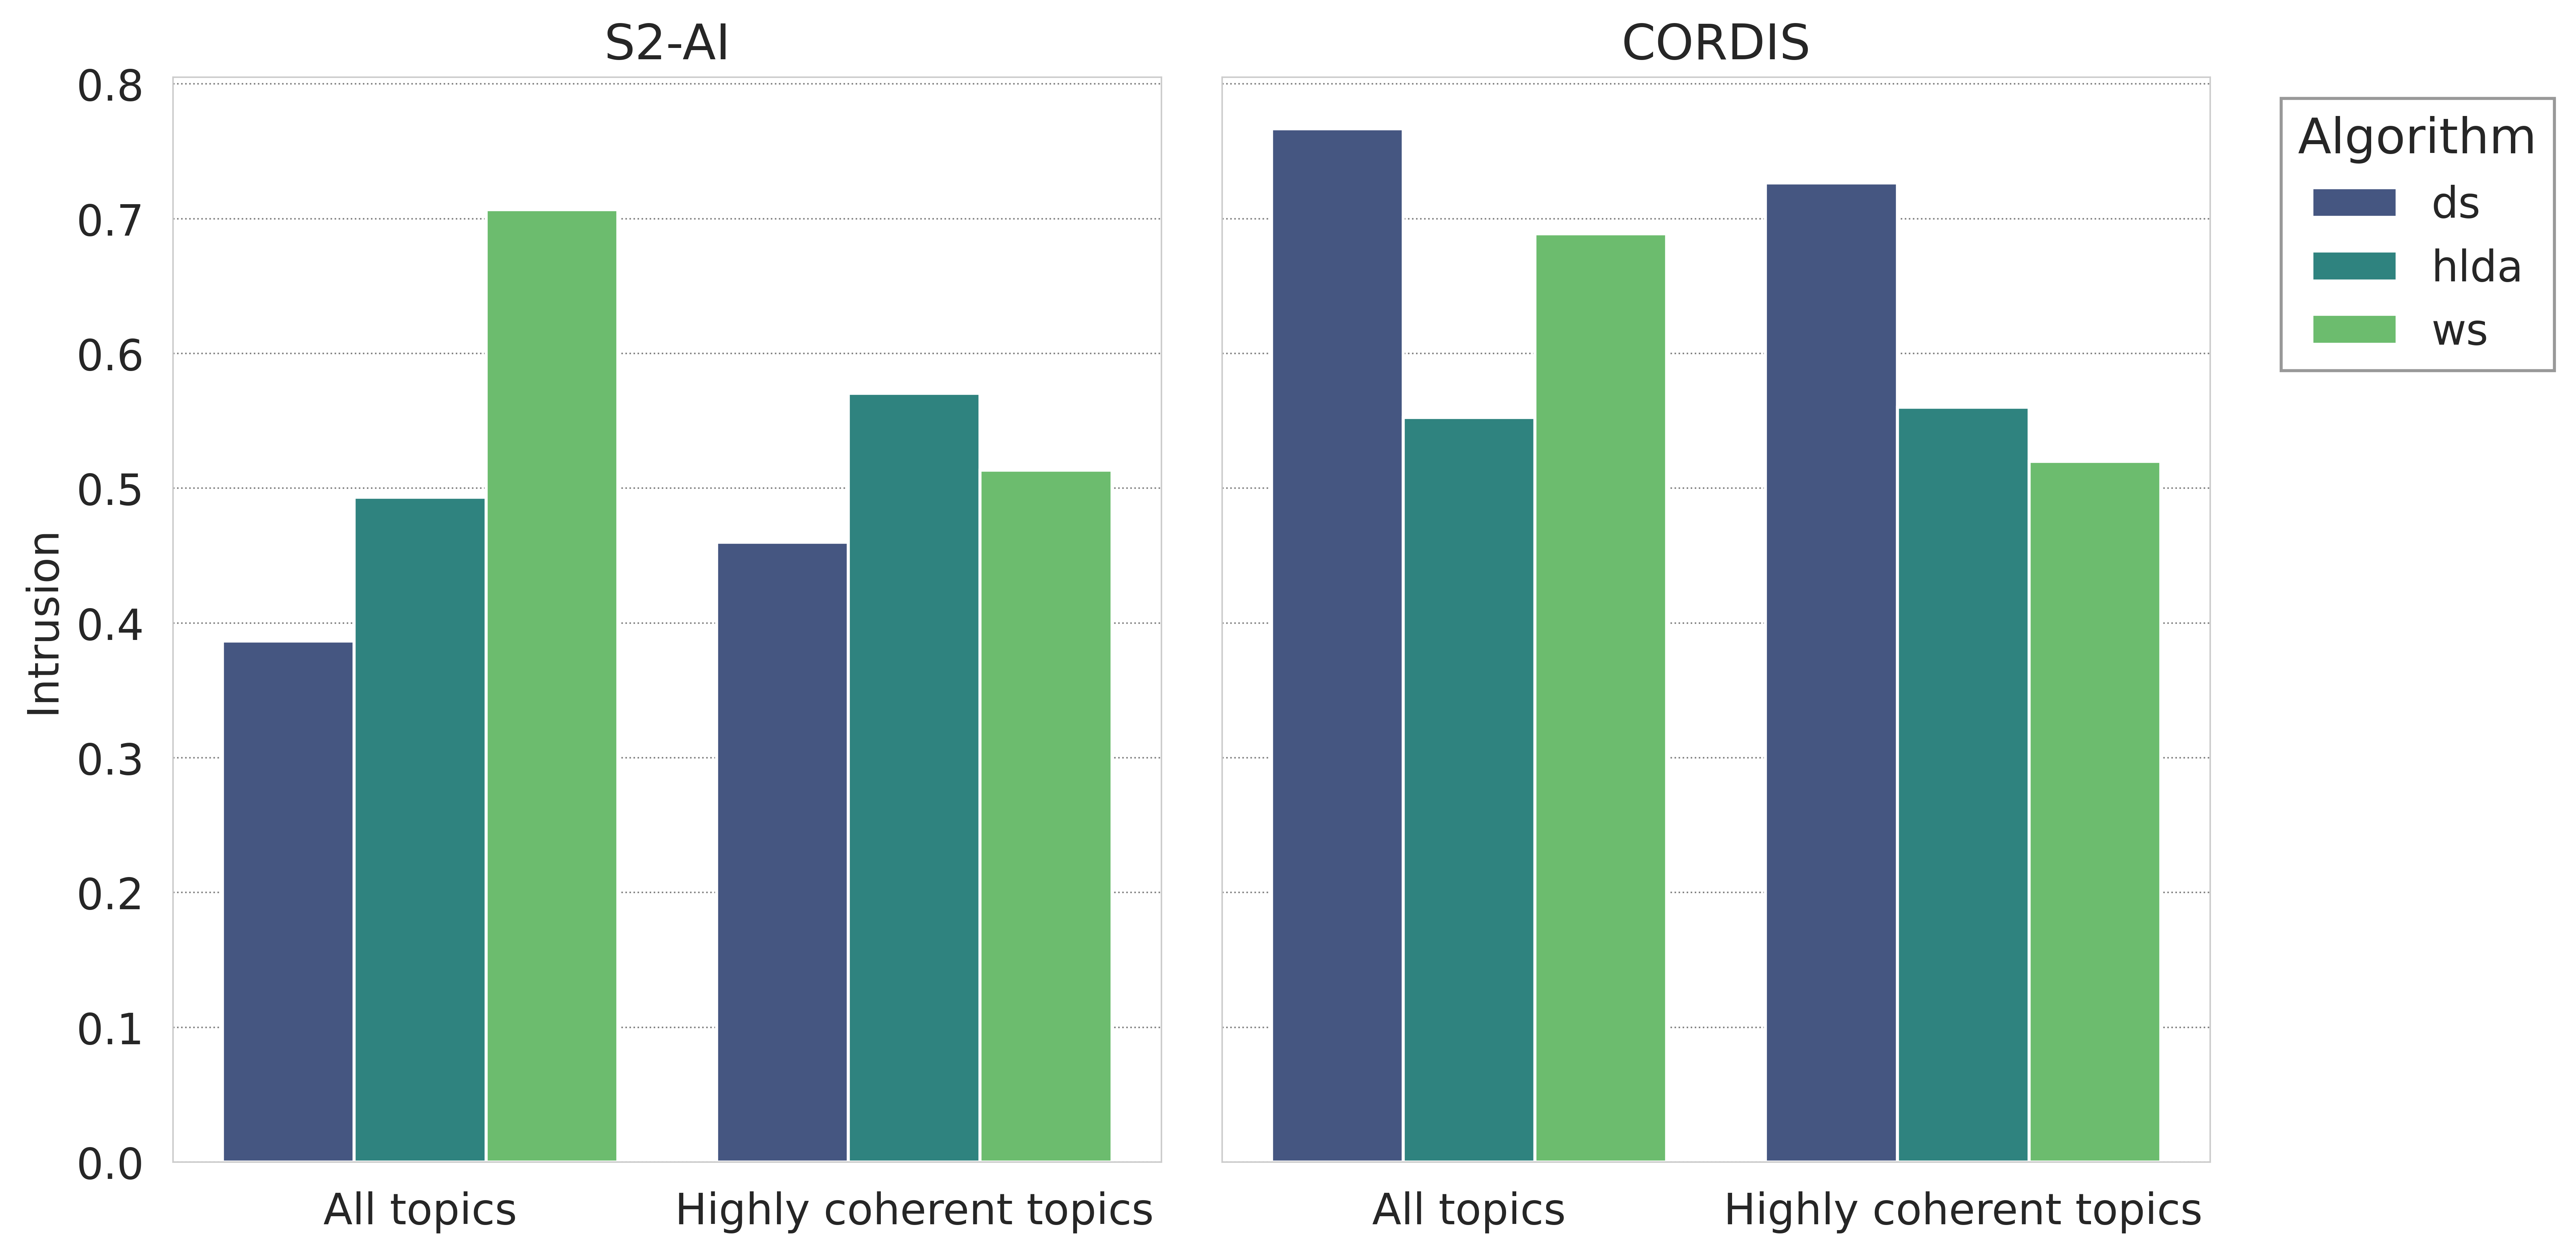

In [1687]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
desired_labels = ["All topics", "Highly coherent topics"]

sns.barplot(x='cohrs', y='precision', hue='model_type', data=df_plot_ai1[df_plot_ai1.cohrs.isin(["high", "all"])], palette='viridis', dodge=True, ax=axes[0])
axes[0].set_title('S2-AI')
axes[0].get_legend().remove()
axes[0].set_ylabel('Intrusion')
axes[0].set_xlabel('')
axes[0].set_xticklabels(desired_labels)

# Plot for df_plot2
sns.barplot(x='cohrs', y='precision', hue='model_type', data=df_plot_cordis1[df_plot_cordis1.cohrs.isin(["high", "all"])], palette='viridis', dodge=True, ax=axes[1])
axes[1].set_title('CORDIS')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_xticklabels(desired_labels)

legend = plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_title().set_fontsize('16')

plt.tight_layout()

plt.show()

fig.savefig('images/intruders.png', dpi=300)

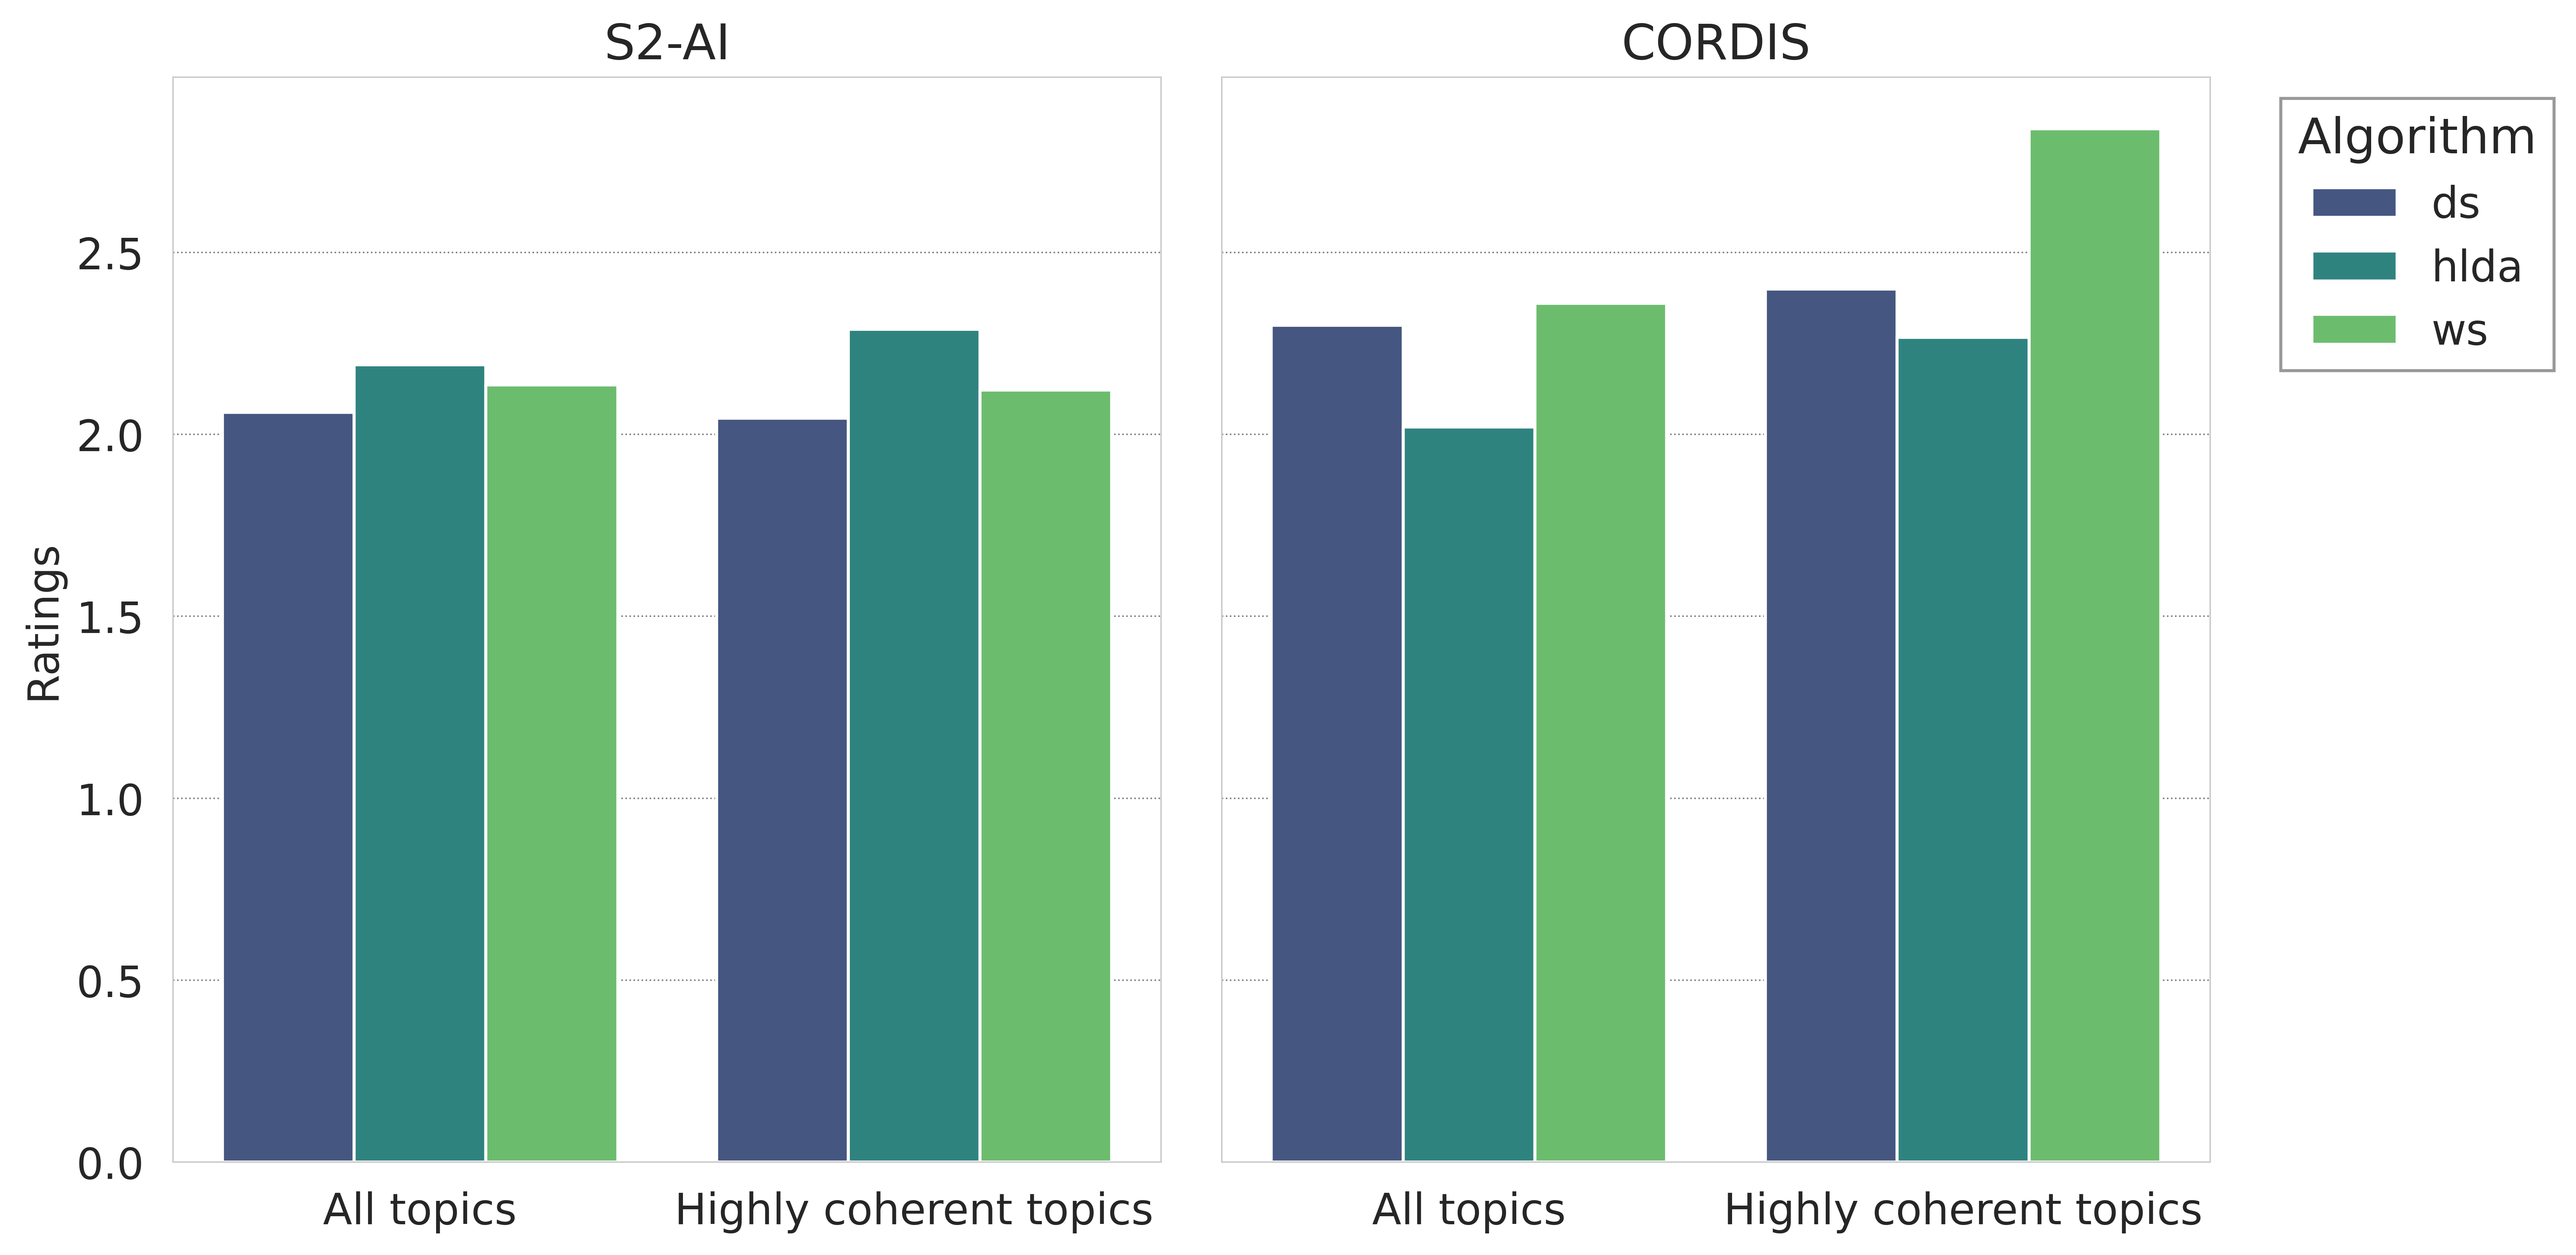

In [1688]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
desired_labels = ["All topics", "Highly coherent topics"]

sns.barplot(x='cohrs', y='ratings_mean', hue='model_type', data=df_plot_ai2[df_plot_ai2.cohrs.isin(["high", "all"])], order=["all", "high"], palette='viridis', dodge=True, ax=axes[0])
axes[0].set_title('S2-AI')
axes[0].get_legend().remove()
axes[0].set_xlabel('')
axes[0].set_ylabel('Ratings')
axes[0].set_xticklabels(desired_labels)

sns.barplot(x='cohrs', y='ratings_mean', hue='model_type', data=df_plot_cordis2[df_plot_cordis2.cohrs.isin(["high", "all"])], order=["all", "high"], palette='viridis', dodge=True, ax=axes[1])
axes[1].set_title('CORDIS')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(desired_labels)

legend = plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_title().set_fontsize('16')

plt.tight_layout()

plt.show()

fig.savefig('images/ratings.png', dpi=300)

## Task 2

In [1689]:
df = pd.read_csv("task_2a.csv")
question_columns = [el for el in df.columns.tolist() if el.startswith("AI") or el.startswith("COR") or el.startswith("CAN")]
df_task2a = df[question_columns].drop([0,1]).dropna()

def extract_text(cell):
    if pd.notna(cell):
        matches = re.findall(r'"(.*?)"', cell)
        if matches:
            return matches[0]
    return cell

# Apply the function to all elements in the DataFrame
df_task2a = df_task2a.applymap(extract_text)

In [1690]:
df_task2a.columns = df_task2a.columns.str.extract(r'(\d+)', expand=False)
df_task2a = pd.concat([df["PROLIFIC_PID"].drop([0, 1]), df_task2a], axis=1).dropna()
df_task2a.set_index("PROLIFIC_PID", inplace=True)

In [1691]:
cordis_ids = [int(el.split("COR")[1]) if "COR" in el else None for el in question_columns]
cordis_ids = [el for el in cordis_ids if el != None]
cancer_ids = [int(el.split("CAN")[1]) if "CAN" in el else None for el in question_columns]
cancer_ids = [el for el in cancer_ids if el != None]
ai_ids = [int(el.split("AI")[1]) if "AI" in el else None for el in question_columns]
ai_ids = [el for el in ai_ids if el != None]

In [1692]:
df_sol_cor = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task2/output/candidates_cordis.csv")
df_sol_can = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task2/output/candidates_cancer.csv")
df_sol_ai = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task2/output/candidates_ai.csv")
df_sol_cor = df_sol_cor[df_sol_cor['id'].isin(cordis_ids)][["id", "ws_label", "ds_label", "answer"]]
df_sol_cor['sol'] = np.where(df_sol_cor['answer'] == 'ws', df_sol_cor['ws_label'], df_sol_cor['ds_label'])
df_sol_cor["type"] = "CORDIS"
df_sol_can = df_sol_can[df_sol_can['id'].isin(cancer_ids)][["id", "ws_label", "ds_label", "answer"]]
df_sol_can["type"] = "S2-CANCER"
df_sol_can['sol'] = np.where(df_sol_can['answer'] == 'ws', df_sol_can['ws_label'], df_sol_can['ds_label'])
df_sol_ai = df_sol_ai[df_sol_ai['id'].isin(ai_ids)][["id", "ws_label", "ds_label", "answer"]]
df_sol_ai['sol'] = np.where(df_sol_ai['answer'] == 'ws', df_sol_ai['ws_label'], df_sol_ai['ds_label'])
df_sol_ai["type"] = "S2-AI"

df_sols = pd.concat([df_sol_cor,df_sol_can,df_sol_ai])[['id','answer','sol', 'type']]
df_sols['sol'] = df_sols['sol'].str.strip('"\n')
df_sols['id'] = df_sols['id'].astype('str')

In [1693]:
df_transposed = df_task2a.transpose()
df = pd.merge(df_transposed, df_sols, left_index=True, right_on='id').drop("id", axis=1)

tp = 1 # ws being ws
tp2 = 2 # ds being ds
fp = 3 # ds being ws
fn = 4 # ws being ds

for col in df.columns[:-3]:
    df[col + '_match'] = 0  # Initialize the new column with default value

    # Check if the values in the current column match the 'sol' column
    match_condition = df[col] == df['sol']

    # Update the new column based on conditions
    df.loc[match_condition & (df['answer'] == 'ws'), col + '_match'] = tp
    df.loc[match_condition & (df['answer'] == 'ds'), col + '_match'] = tp2
    df.loc[~match_condition & (df['answer'] == 'ws'), col + '_match'] = fp
    df.loc[~match_condition & (df['answer'] == 'ds'), col + '_match'] = fn

df

,653e5c7874e28199021b60b2,611ce8a8c0387fe34682eaab,613b13afd0454009dd8ecfee,6015801ce68e22652f8b0b97,60d1914758ff8868dee5815d,5ed7a7a467a98224295459ff,60410999fb894b08f5b08061,6150cbe343b62ce72374093d,60fd5bc629663dec819d54e3,60f1f1d4ac991a259b83f603,...,5ed7a7a467a98224295459ff_match,60410999fb894b08f5b08061_match,6150cbe343b62ce72374093d_match,60fd5bc629663dec819d54e3_match,60f1f1d4ac991a259b83f603_match,64da55de6c1b3c280c2a599b_match,615da9ee365ab7d547b98979_match,60dc54db60a4dca481ba3608_match,60d1b7642d082fa4cebddfd2_match,5f6a7fd6b451fd14e0305520_match
61,Public Health and Preventive Medicine,Public Health and Preventive Medicine,Public Health and Preventive Medicine,Public Health and Preventive Medicine,Public Health and Preventive Medicine,Public Health and Preventive Medicine,Public Health and Preventive Medicine,Clinical Drug Trials and Disease Diagnosis,Public Health and Preventive Medicine,Clinical Drug Trials and Disease Diagnosis,...,2,2,4,2,4,2,4,2,2,2
62,Clinical Drug Trials and Disease Diagnosis,Clinical Drug Trials and Disease Diagnosis,Clinical Drug Trials and Disease Diagnosis,Clinical Drug Trials and Disease Diagnosis,Clinical Drug Trials and Disease Diagnosis,Clinical Drug Trials and Disease Diagnosis,Clinical Drug Trials and Disease Diagnosis,Public Health and Preventive Medicine,Clinical Drug Trials and Disease Diagnosis,Public Health and Preventive Medicine,...,1,1,3,1,3,1,1,1,1,3
40,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,Neuroscience and Cognitive Behavior,...,2,2,2,2,2,2,2,2,2,2
41,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,Plant Pathogen and Microbiome Interaction,...,1,1,1,1,1,1,1,1,1,1
10,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,Macroeconomics and Financial Market Analysis,...,2,2,2,2,2,2,2,2,2,2
11,Historical Linguistics and Cultural Studies,Historical Linguistics and Cultural Studies,Historical Linguistics and Cultural Studies,Historical Linguistics and Cultural Studies,Historical Linguistics and Cultural Studies,Historical Linguistics and Cultural Studies,Historical Linguistics and Cultural Studies,Historical Linguistics and Cultural Studies,Macroeconomics and Financial Market Analysis,Historical Linguistics and Cultural Studies,...,1,1,1,3,1,1,1,1,1,1
26,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,Quantum Computing and Quantum Physics,...,4,4,4,4,4,4,4,4,4,4
28,Mathematical Theories and Computer Science,Mathematical Theories and Computer Science,Mathematical Theories and Computer Science,Mathematical Theories and Computer Science,Mathematical Theories and Computer Science,Mathematical Theories and Computer Science,Mathematical Theories and Computer Science,Mathematical Theories and Computer Science,Mathematical Theories and Computer Sci

In [1694]:
df[df.type == "COR"].eq(1).sum().sum()

0.0

In [1695]:
def my_agg(x):
    relevant_columns = [col for col in x.filter(regex='_match$', axis=1).columns.tolist()]
    tp = x[relevant_columns].eq(1).sum().sum()
    tp2 = x[relevant_columns].eq(2).sum().sum()
    fp = x[relevant_columns].eq(3).sum().sum()
    fn = x[relevant_columns].eq(4).sum().sum()
    
    names = {
        'ws_ws': tp,
        'ds_ds': tp2,
        'ws_ds': fp,
        'ds_ws': fn,
    }
    
    return pd.Series(names, index=['ws_ws', 'ds_ds', 'ws_ds', 'ds_ws'])
    
dp_task2a_agg = df.groupby(['type'], as_index=False).apply(my_agg)
dp_task2a_agg

,type,ws_ws,ds_ds,ws_ds,ds_ws
0,CORDIS,68,55,7,20
1,S2-AI,60,60,15,15
2,S2-CANCER,56,61,19,14


In [1696]:
thr_task2=13
def my_agg_filtered(x, thr=13):
    relevant_columns = [col for col in x.filter(regex='_match$', axis=1).columns.tolist()]
    tp = x[(x.eq(1).sum(axis=1) <= thr)][relevant_columns].eq(1).sum().sum()
    tp2 = x[(x.eq(2).sum(axis=1) <= thr)][relevant_columns].eq(2).sum().sum()
    fp = x[(x.eq(3).sum(axis=1) <= thr)][relevant_columns].eq(3).sum().sum()
    fn = x[(x.eq(4).sum(axis=1) <= thr)][relevant_columns].eq(4).sum().sum()
    
    names = {
        'ws_ws': tp,
        'ds_ds': tp2,
        'ws_ds': fp,
        'ds_ws': fn,
    }
    
    return pd.Series(names, index=['ws_ws', 'ds_ds', 'ws_ds', 'ds_ws'])
    
dp_task2a_agg_fil = df.groupby(['type'], as_index=False).apply(my_agg_filtered, thr_task2)
dp_task2a_agg_fil

,type,ws_ws,ds_ds,ws_ds,ds_ws
0,CORDIS,24,25,7,5
1,S2-AI,31,17,15,15
2,S2-CANCER,56,18,19,14


In [1697]:
df = pd.read_csv("task_2b.csv")
question_columns = [el for el in df.columns.tolist() if el.startswith("AI") or el.startswith("COR") or el.startswith("CAN")]
df_task2b = df[question_columns].drop([0,1]).dropna()

# Apply the function to all elements in the DataFrame
df_task2b = df_task2b.applymap(extract_text)

df_task2b.columns = df_task2b.columns.str.extract(r'(\d+)', expand=False)
df_task2b = pd.concat([df["PROLIFIC_PID"].drop([0, 1]), df_task2b], axis=1).dropna()
df_task2b = df_task2b.drop(index=np.random.choice(df_task2b.index))

df_task2b.set_index("PROLIFIC_PID", inplace=True)

In [1698]:
cordis_ids = [int(el.split("COR")[1]) if "COR" in el else None for el in question_columns]
cordis_ids = [el for el in cordis_ids if el != None]
cancer_ids = [int(el.split("CAN")[1]) if "CAN" in el else None for el in question_columns]
cancer_ids = [el for el in cancer_ids if el != None]
ai_ids = [int(el.split("AI")[1]) if "AI" in el else None for el in question_columns]
ai_ids = [el for el in ai_ids if el != None]

In [1699]:
df_sol_cor = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task2/output/candidates_cordis.csv")
df_sol_can = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task2/output/candidates_cancer.csv")
df_sol_ai = pd.read_csv("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/UserInLoopHTM/experiments/human_evaluation/task2/output/candidates_ai.csv")
df_sol_cor = df_sol_cor[df_sol_cor['id'].isin(cordis_ids)][["id", "ws_label", "ds_label", "answer"]]
df_sol_cor['sol'] = np.where(df_sol_cor['answer'] == 'ws', df_sol_cor['ws_label'], df_sol_cor['ds_label'])
df_sol_cor["type"] = "CORDIS"
df_sol_can = df_sol_can[df_sol_can['id'].isin(cancer_ids)][["id", "ws_label", "ds_label", "answer"]]
df_sol_can["type"] = "S2-CANCER"
df_sol_can['sol'] = np.where(df_sol_can['answer'] == 'ws', df_sol_can['ws_label'], df_sol_can['ds_label'])
df_sol_ai = df_sol_ai[df_sol_ai['id'].isin(ai_ids)][["id", "ws_label", "ds_label", "answer"]]
df_sol_ai['sol'] = np.where(df_sol_ai['answer'] == 'ws', df_sol_ai['ws_label'], df_sol_ai['ds_label'])
df_sol_ai["type"] = "S2-AI"

df_sols = pd.concat([df_sol_cor,df_sol_can,df_sol_ai])[['id','answer','sol', 'type']]
df_sols['sol'] = df_sols['sol'].str.strip('"\n')
df_sols['id'] = df_sols['id'].astype('str')

In [1700]:
df_transposed = df_task2b.transpose()
df = pd.merge(df_transposed, df_sols, left_index=True, right_on='id').drop("id", axis=1)

tp = 1 # ws being ws
tp2 = 2 # ds being ds
fp = 3 # ds being ws
fn = 4 # ws being ds

for col in df.columns[:-3]:
    df[col + '_match'] = 0  # Initialize the new column with default value

    # Check if the values in the current column match the 'sol' column
    match_condition = df[col] == df['sol']

    # Update the new column based on conditions
    df.loc[match_condition & (df['answer'] == 'ws'), col + '_match'] = tp
    df.loc[match_condition & (df['answer'] == 'ds'), col + '_match'] = tp2
    df.loc[~match_condition & (df['answer'] == 'ws'), col + '_match'] = fp
    df.loc[~match_condition & (df['answer'] == 'ds'), col + '_match'] = fn

df

,5ff9ffb84253f538509686c1,5c741a67566c7700173ed014,60d601ecc6b6865267138eb7,5b74413e722bd2000195c067,6015801ce68e22652f8b0b97,5ef3ee6d6183a418829b78d6,6063211b7de1f848fb436f5c,610d4b020c0ec927cbd29bb4,615d50afaa1ddf26457e079c,615a395e37b6993b6049d202,...,5ef3ee6d6183a418829b78d6_match,6063211b7de1f848fb436f5c_match,610d4b020c0ec927cbd29bb4_match,615d50afaa1ddf26457e079c_match,615a395e37b6993b6049d202_match,6153fbefd17cade93160d2e6_match,60db6cbfbdc2bef6285fe52c_match,6167d73838d5341dfd542437_match,64eb35ef1ba43229b2ac57c6_match,64ad5e81e337763c2ded8066_match
53,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,Sustainable Agriculture and Aquaculture,...,2,2,2,2,2,2,2,2,2,2
54,Materials Science and Metallurgy,Materials Science and Metallurgy,Materials Science and Metallurgy,Materials Science and Metallurgy,Materials Science and Metallurgy,Materials Science and Metallurgy,Materials Science and Metallurgy,Materials Science and Metallurgy,Materials Science and Metallurgy,Materials Science and Metallurgy,...,1,1,1,1,1,1,1,1,1,1
59,Energy Storage and Conversion Technologies,Energy Storage and Conversion Technologies,Renewable Energy and Heat Management,Energy Storage and Conversion Technologies,Renewable Energy and Heat Management,Energy Storage and Conversion Technologies,Energy Storage and Conversion Technologies,Energy Storage and Conversion Technologies,Energy Storage and Conversion Technologies,Renewable Energy and Heat Management,...,2,2,2,2,4,2,2,2,2,2
60,Renewable Energy and Heat Management,Renewable Energy and Heat Management,Renewable Energy and Heat Management,Renewable Energy and Heat Management,Renewable Energy and Heat Management,Renewable Energy and Heat Management,Renewable Energy and Heat Management,Renewable Energy and Heat Management,Renewable Energy and Heat Management,Renewable Energy and Heat Management,...,1,1,1,1,1,1,1,1,1,1
29,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,Mathematical Concepts in String Theory,...,2,2,2,2,2,2,2,2,2,2
30,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,Solar Cell Fabrication and Semiconductor Techn...,...,1,1,1,1,1,1,1,1,1,1
44,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,Evolutionary Biology and Genetics,...,2,2,2,2,2,2,2,2,2,2
45,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,Protein Structure and Synthesis in Structural ...,.

In [1701]:
dp_task2b_agg = df.groupby(['type'], as_index=False).apply(my_agg)
dp_task2b_agg

,type,ws_ws,ds_ds,ws_ds,ds_ws
0,CORDIS,75,72,0,3
1,S2-AI,66,66,9,9
2,S2-CANCER,62,63,13,12


In [1702]:
dp_task2b_agg_fil = df.groupby(['type'], as_index=False).apply(my_agg_filtered, thr_task2)
dp_task2b_agg_fil

,type,ws_ws,ds_ds,ws_ds,ds_ws
0,CORDIS,0,12,0,3
1,S2-AI,8,8,9,9
2,S2-CANCER,48,35,13,12


In [1703]:
df_melted = pd.melt(dp_task2a_agg, id_vars=['type'], value_vars=['ws_ws', 'ds_ds', 'ws_ds', 'ds_ws'],
                    var_name='Label', value_name='Count')
df_melted[['Real', 'Predicted']] = df_melted['Label'].str.split('_', expand=True)

df_melted2 = pd.melt(dp_task2b_agg, id_vars=['type'], value_vars=['ws_ws', 'ds_ds', 'ws_ds', 'ds_ws'],
                    var_name='Label', value_name='Count')
df_melted2[['Real', 'Predicted']] = df_melted2['Label'].str.split('_', expand=True)

# Combine results task2A and task2B
df_melted_f = pd.concat([df_melted, df_melted2], ignore_index=True).groupby(['type', 'Label', 'Real', 'Predicted'])['Count'].sum().reset_index()


df_melted = pd.melt(dp_task2a_agg_fil, id_vars=['type'], value_vars=['ws_ws', 'ds_ds', 'ws_ds', 'ds_ws'],
                    var_name='Label', value_name='Count')
df_melted[['Real', 'Predicted']] = df_melted['Label'].str.split('_', expand=True)

df_melted2 = pd.melt(dp_task2b_agg_fil, id_vars=['type'], value_vars=['ws_ws', 'ds_ds', 'ws_ds', 'ds_ws'],
                    var_name='Label', value_name='Count')
df_melted2[['Real', 'Predicted']] = df_melted2['Label'].str.split('_', expand=True)

# Combine results task2A and task2B
df_melted_fil = pd.concat([df_melted, df_melted2], ignore_index=True).groupby(['type', 'Label', 'Real', 'Predicted'])['Count'].sum().reset_index()

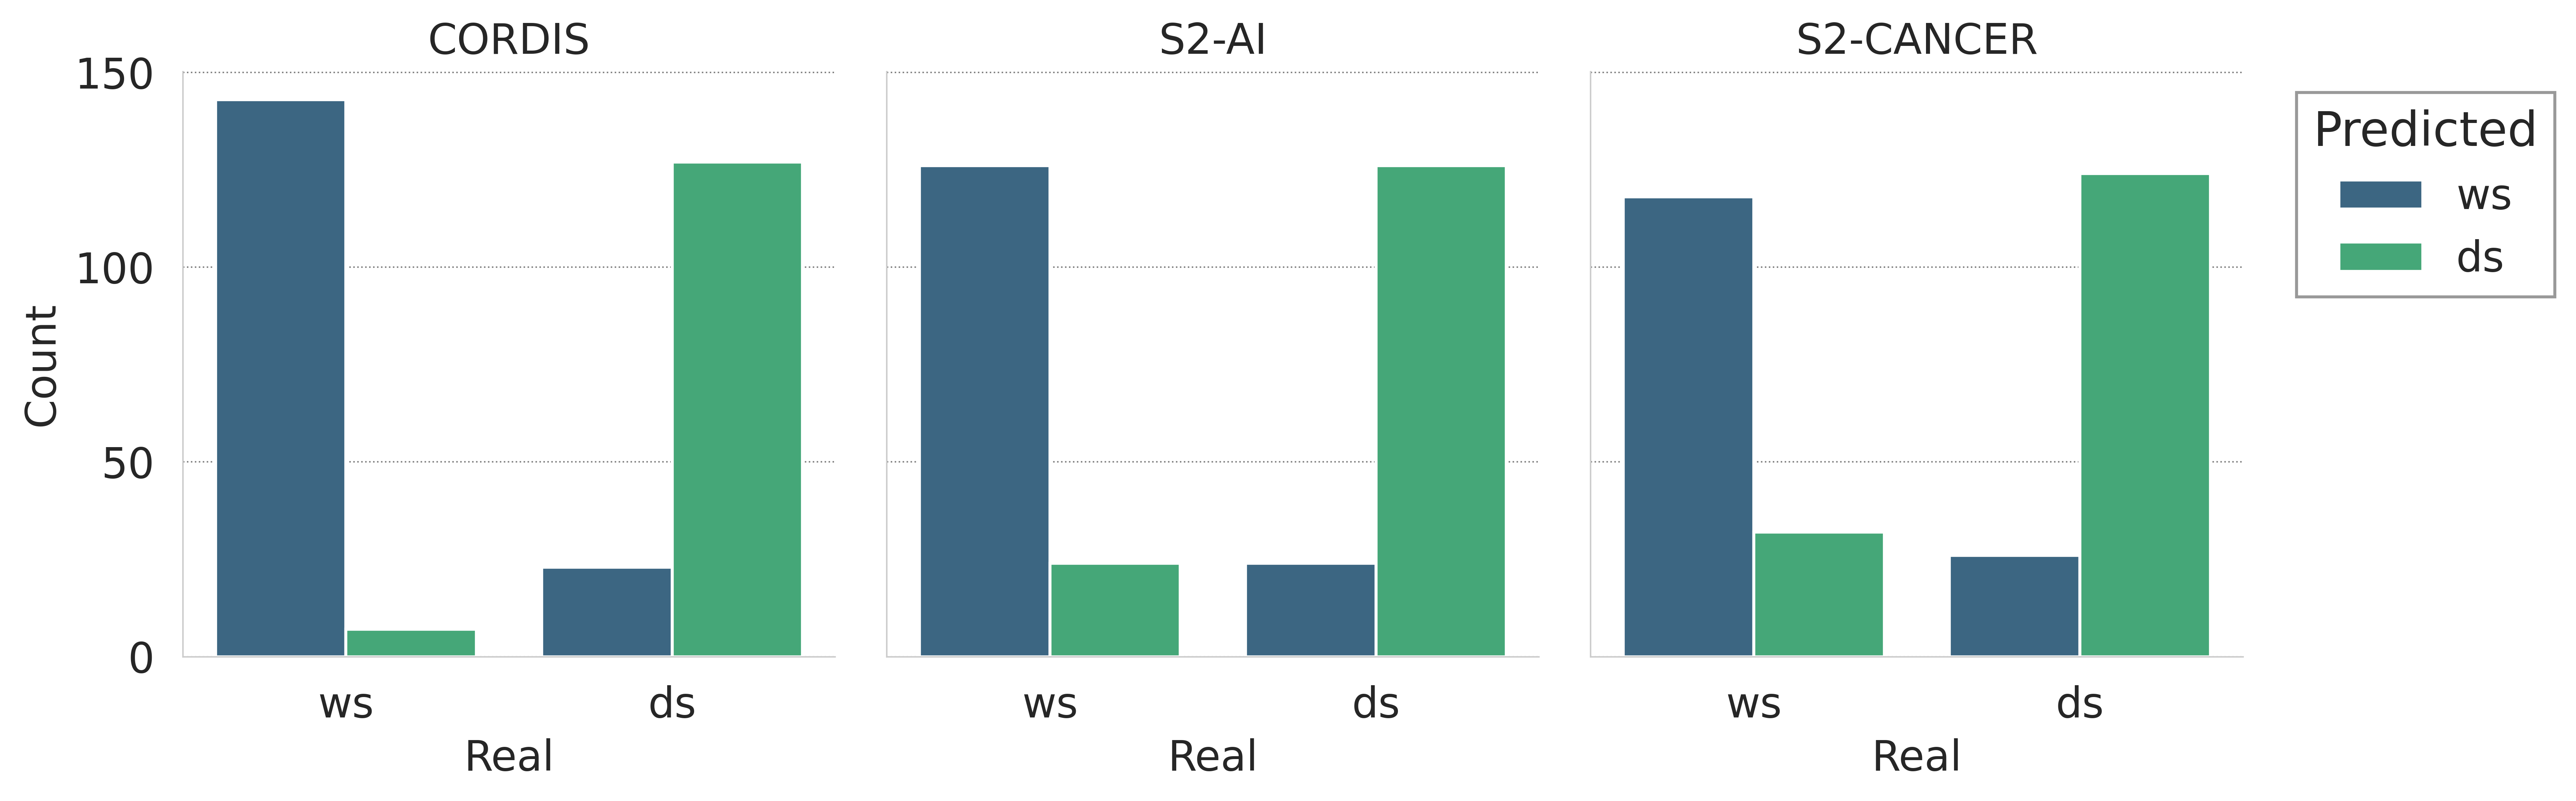

In [1704]:
g = sns.FacetGrid(df_melted_f, col="type", height=4, aspect=.9, col_wrap=3)
g.map(sns.barplot, "Real", "Count", "Predicted", order=["ws", "ds"], hue_order=["ws","ds"], palette='viridis', dodge=True)
g.set_axis_labels('Real', 'Count')
g.set_titles(col_template="{col_name}")

legend = plt.legend(title='Predicted', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_title().set_fontsize('16')

g.set_axis_labels('Real', 'Count')
g.set_titles(col_template="{col_name}")

plt.show()

g.savefig('images/task2_all.png', dpi=300)

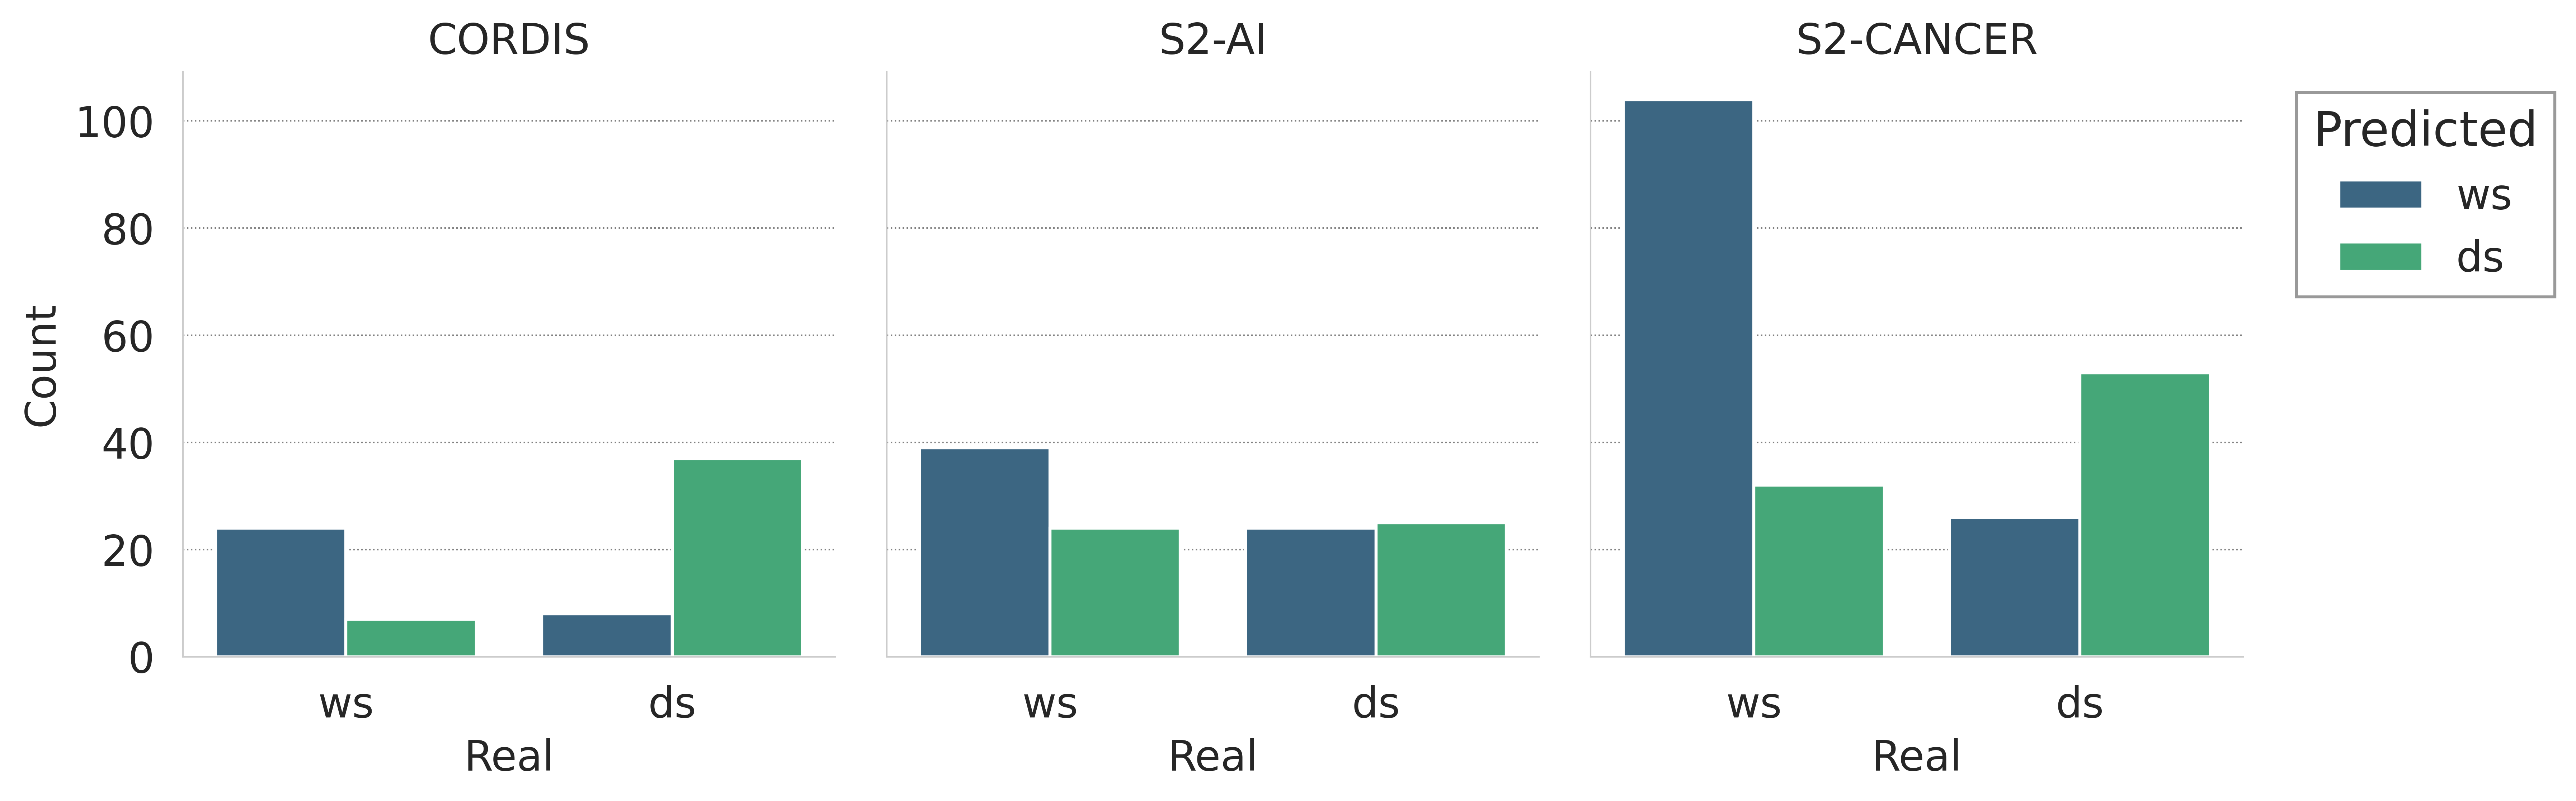

In [1705]:
g = sns.FacetGrid(df_melted_fil, col="type", height=4, aspect=.9, col_wrap=3)
g.map(sns.barplot, "Real", "Count", "Predicted", order=["ws", "ds"], hue_order=["ws","ds"], palette='viridis', dodge=True)
g.set_axis_labels('Real', 'Count')
g.set_titles(col_template="{col_name}")

legend = plt.legend(title='Predicted', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_title().set_fontsize('16')

g.set_axis_labels('Real', 'Count')
g.set_titles(col_template="{col_name}")

plt.show()

g.savefig('images/task2_13.png', dpi=300)

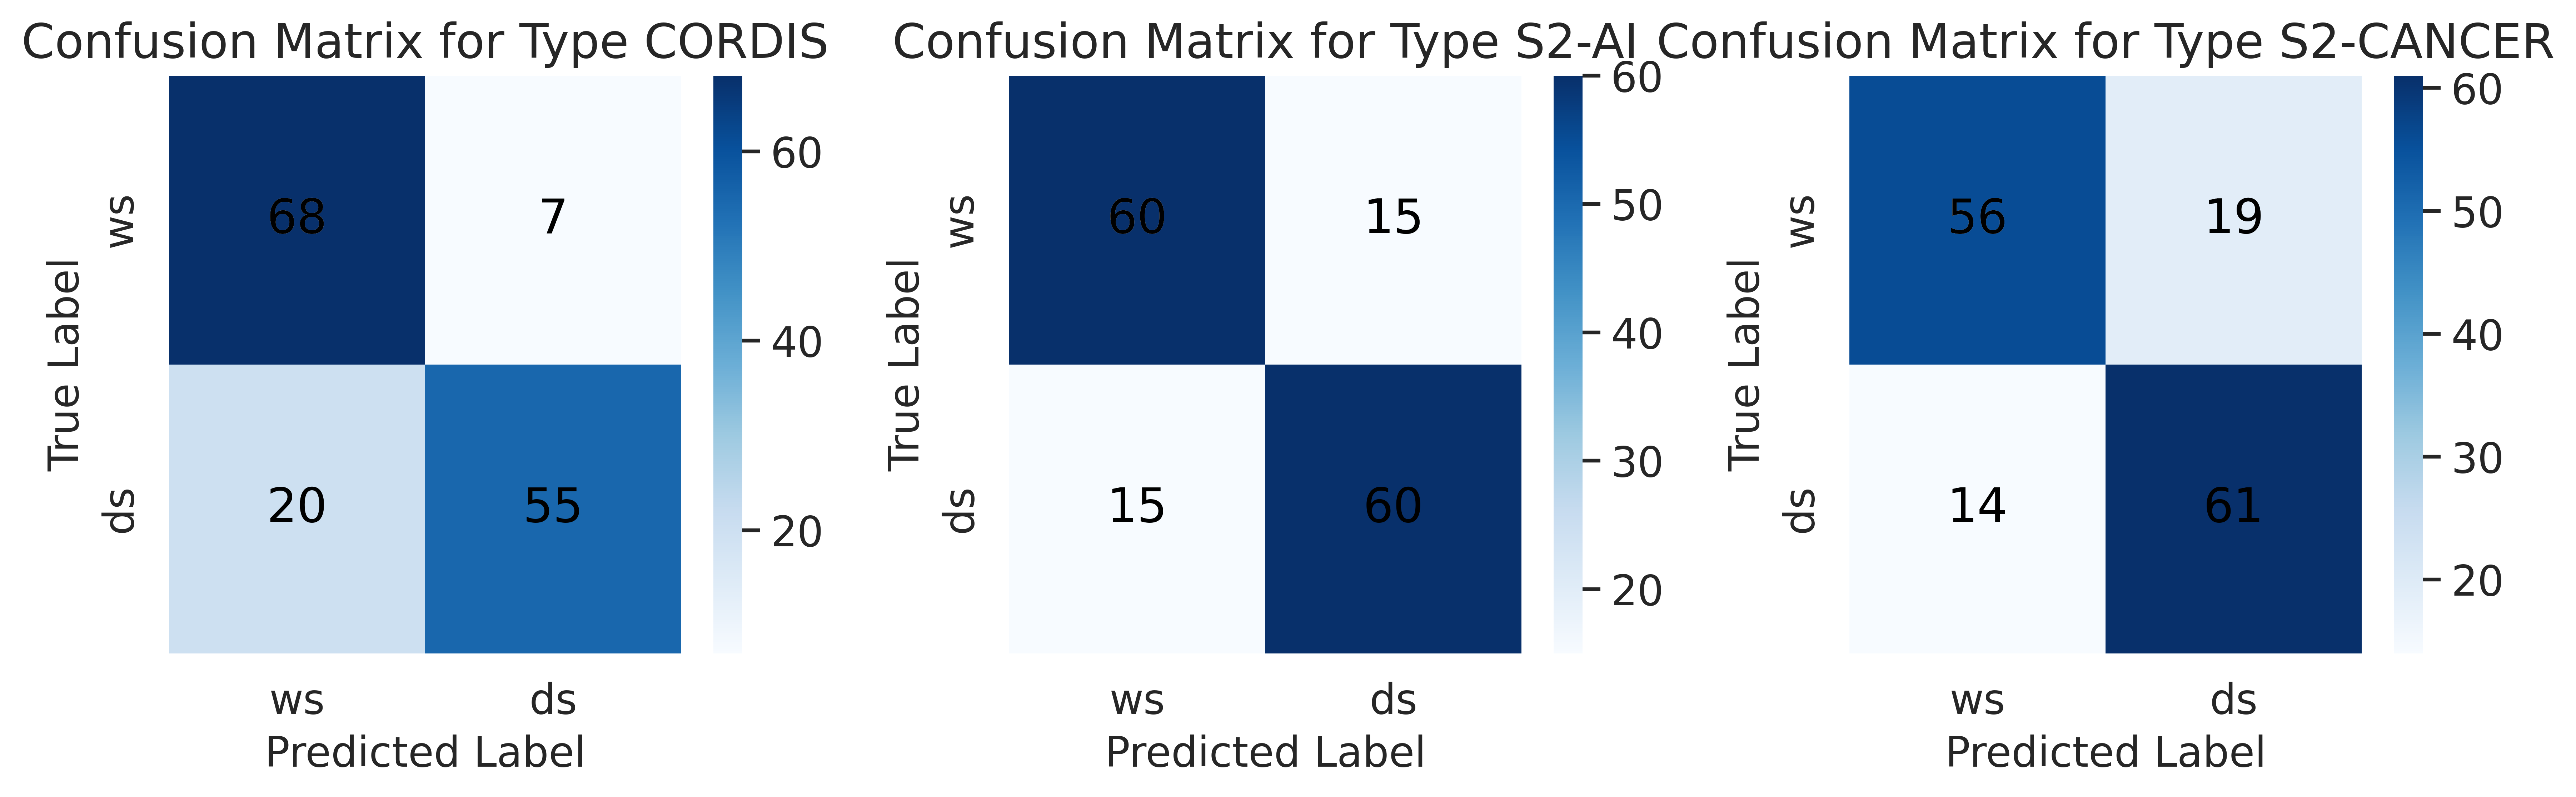

In [1706]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=len(dp_task2a_agg), figsize=(12, 4))

# Iterate through each type
for idx, (ax, (_, row)) in enumerate(zip(axes, dp_task2a_agg.iterrows())):
    true_labels = []
    predicted_labels = []

    for column in ['ws_ws', 'ds_ds', 'ws_ds', 'ds_ws']:
        true_labels.extend([column.split('_')[0]] * row[column])
        predicted_labels.extend([column.split('_')[1]] * row[column])

    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['ws', 'ds'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ws', 'ds'], yticklabels=['ws', 'ds'], ax=ax)

    # Add annotations for "ds" values
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix[i])):
            ax.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', ha='center', va='center', color='black')

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Confusion Matrix for Type {row["type"]}')

plt.tight_layout()
plt.show()

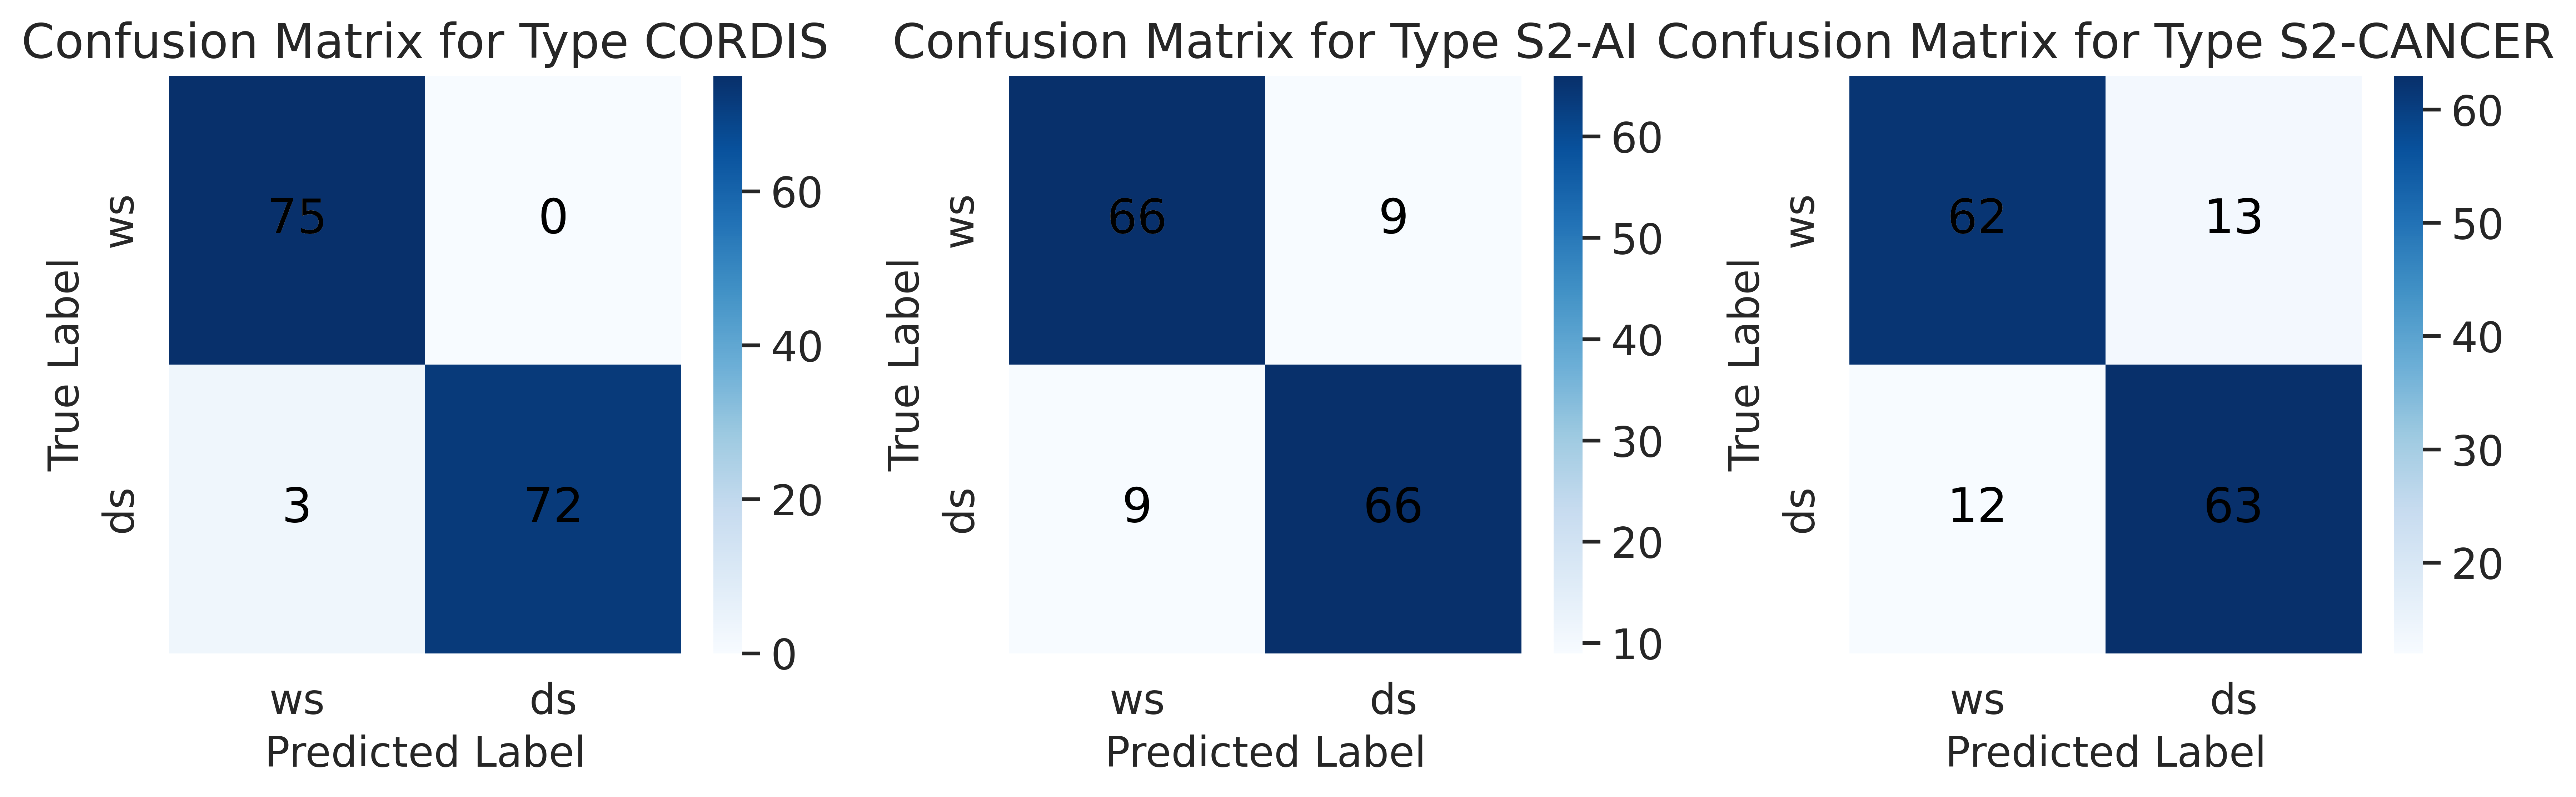

In [1707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=len(dp_task2b_agg), figsize=(12, 4))

# Iterate through each type
for idx, (ax, (_, row)) in enumerate(zip(axes, dp_task2b_agg.iterrows())):
    true_labels = []
    predicted_labels = []

    for column in ['ws_ws', 'ds_ds', 'ws_ds', 'ds_ws']:
        true_labels.extend([column.split('_')[0]] * row[column])
        predicted_labels.extend([column.split('_')[1]] * row[column])

    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['ws', 'ds'])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ws', 'ds'], yticklabels=['ws', 'ds'], ax=ax)

    # Add annotations for "ds" values
    for i in range(len(conf_matrix)):
        for j in range(len(conf_matrix[i])):
            ax.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', ha='center', va='center', color='black')

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Confusion Matrix for Type {row["type"]}')

plt.tight_layout()
plt.show()